### Import package

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

import ipywidgets as widgets
from IPython.display import display, clear_output

## PHASE 1 Data

### Importing dataset

In [86]:
# low_memory=False, to prevent warning due to excessively large files
df = pd.read_csv('immo_data.csv', low_memory=False)

### Check dataset

In [87]:
print("check dataset: ")
pd.set_option('display.max_columns', None)
display(df[75:78]) #df.head()/df.tail(): default n=5
print("check the columns: ")
print(df.columns.tolist())

check dataset: 


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
75,Sachsen,107.0,central_heating,ONE_YEAR_FREE,NaN,False,False,7,0.90,40.0,370.0,1920.0,114424603,NaN,gas,True,Sachsen,True,1.0,263.0,NaN,46.61,Zwickau,refurbished,normal,NaN,no_information,NaN,False,1,NaN,8058,2.0,92.1,3.0,NaN,2,False,2,Zwickau,Nordvorstadt,Mindestvertragsdauer 2 Jahre,NaN,NaN,NaN,2005.0,NaN,NaN,Feb20
76,Sachsen,65.0,central_heating,ONE_YEAR_FREE,NaN,False,False,6,3.85,40.0,346.0,NaN,113441961,NaN,NaN,False,Sachsen,True,NaN,229.0,4a,32.61,Leipzig,NaN,normal,NaN,Zingster Stra&szlig;e,Zingster_Straße,False,1,NaN,4207,1.0,NaN,5.0,NaN,1,False,1,Leipzig,Lausen_Grünau,Unser vollständiges Wohnungsangebot in Leipzig...,Gemütliche 1-RW im 5. OG mit folgender Ausstat...,52.0,NaN,NaN,NaN,NaN,Feb20
77,Berlin,150.0,floor_heating,ONE_YEAR_FREE,NaN,True,True,15,6.60,40.0,1300.0,2019.0,113704695,1.0,district_heating,True,Berlin,True,9.0,1150.0,27,46.40,Berlin,first_time_use,luxury,no,Stallschreiberstra&szlig;e,Stallschreiberstraße,True,7,apartment,10179,2.0,NaN,3.0,5.0,2,False,2,Berlin,Mitte_Mitte,Dieses luxuriöse Neubauquartier direkt am Luis...,"• sehr ruhig gelegen, trotz zentraler Lage, da...",NaN,NaN,NaN,NaN,NaN,Oct19


check the columns: 
['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer', 'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount', 'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln', 'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber', 'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed', 'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat', 'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors', 'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3', 'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date']


### Copy a berlin dataset
Copy to prevent changes on original dataset(df). Without copy() is similar to pick a view, copy() is similar to save as a new file.

In [88]:
df_berlin = df[df['regio1'] == 'Berlin'].copy()
print(f"all germany sample numbers: {df.shape[0]}")
print(f"all berlin samples numbers: {df_berlin.shape[0]}")

all germany sample numbers: 268850
all berlin samples numbers: 10406


### Data health check for selected features

Berlin data health check: 


,totalRent,livingSpace,yearConstructed,noRooms
count,9744.000000,10406.000000,8981.000000,10406.000000
mean,1385.341741,81.817844,1965.192072,2.565520
std,1129.695296,44.094348,49.557871,1.461288
min,0.000000,3.000000,1097.000000,1.000000
25%,790.000000,55.600000,1911.000000,2.000000
50%,1124.000000,72.000000,1978.000000,2.000000
75%,1685.217500,97.000000,2015.000000,3.000000
max,51570.000000,566.000000,2029.000000,99.500000


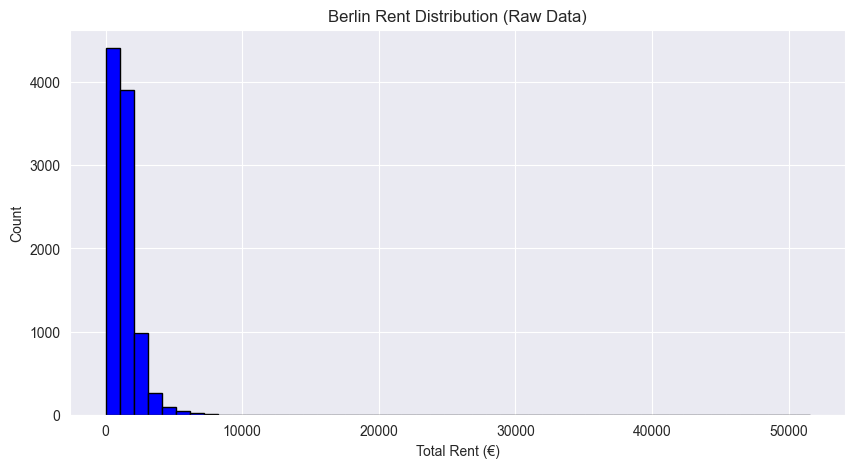

In [89]:
print("Berlin data health check: ")
cols_to_check = ['totalRent','livingSpace','yearConstructed','noRooms']
# .describe() most commonly used "health check report" generator in data analysis
display(df_berlin[cols_to_check].describe())

# Visual check
plt.figure(figsize=(10,5))
plt.hist(df_berlin['totalRent'],bins=50,color='blue',edgecolor='black')
plt.title("Berlin Rent Distribution (Raw Data)")
plt.xlabel("Total Rent (€)")
plt.ylabel("Count")
plt.show()


### Clear data and then check again

Sample numbers after cleaning: 8345


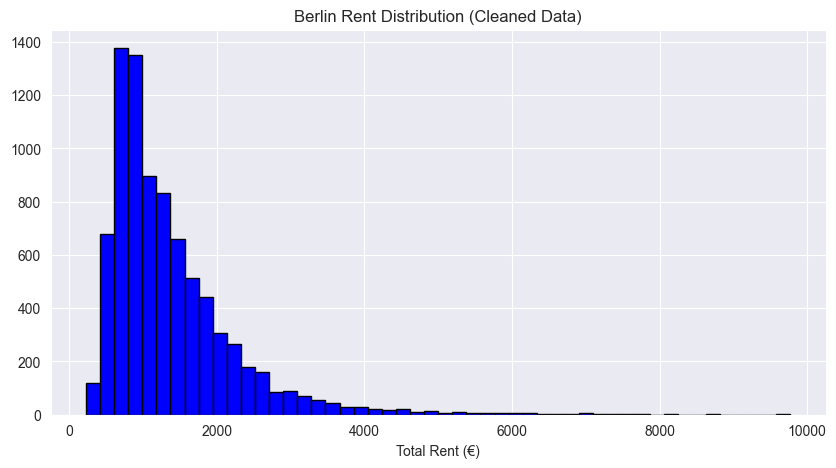

In [90]:
# Drop NaN (axis, how, thresh, subset=totalRent)
df_berlin = df_berlin.dropna(subset=['totalRent'])

# Clear too low/high totalRent
df_berlin = df_berlin[(df_berlin['totalRent']>100) & (df_berlin['totalRent']<10000)]

# Clear too small/big livingSpace, clear too old yearConstructed
df_berlin = df_berlin[(df_berlin['livingSpace'] > 10) & (df_berlin['livingSpace'] < 500)]
df_berlin = df_berlin[(df_berlin['yearConstructed']>1850)]

# Check data cleaning result
print(f"Sample numbers after cleaning: {df_berlin.shape[0]}")

# Visual Check
plt.figure(figsize=(10,5))
plt.hist(df_berlin['totalRent'],bins=50,color='blue',edgecolor='black')
plt.title("Berlin Rent Distribution (Cleaned Data)")
plt.xlabel("Total Rent (€)")
plt.show()


# PHASE 2 Preliminary review
### 2.1 Scatter Plot: livingSpace & totalRent

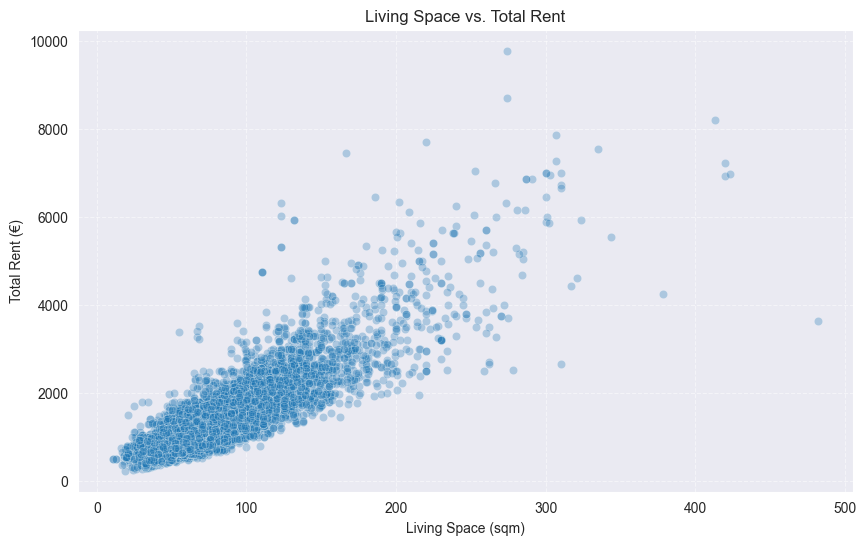

In [91]:
plt.figure(figsize=(10,6))

# scatter plot
sns.scatterplot(data=df_berlin,x='livingSpace',y='totalRent',alpha=0.3)

plt.title("Living Space vs. Total Rent")
plt.xlabel("Living Space (sqm)")
plt.ylabel("Total Rent (€)")
plt.grid(True, linestyle='--',alpha=0.5) #grid lines
plt.show()

### 2.2 Bar Chart: regio3 & totalRent

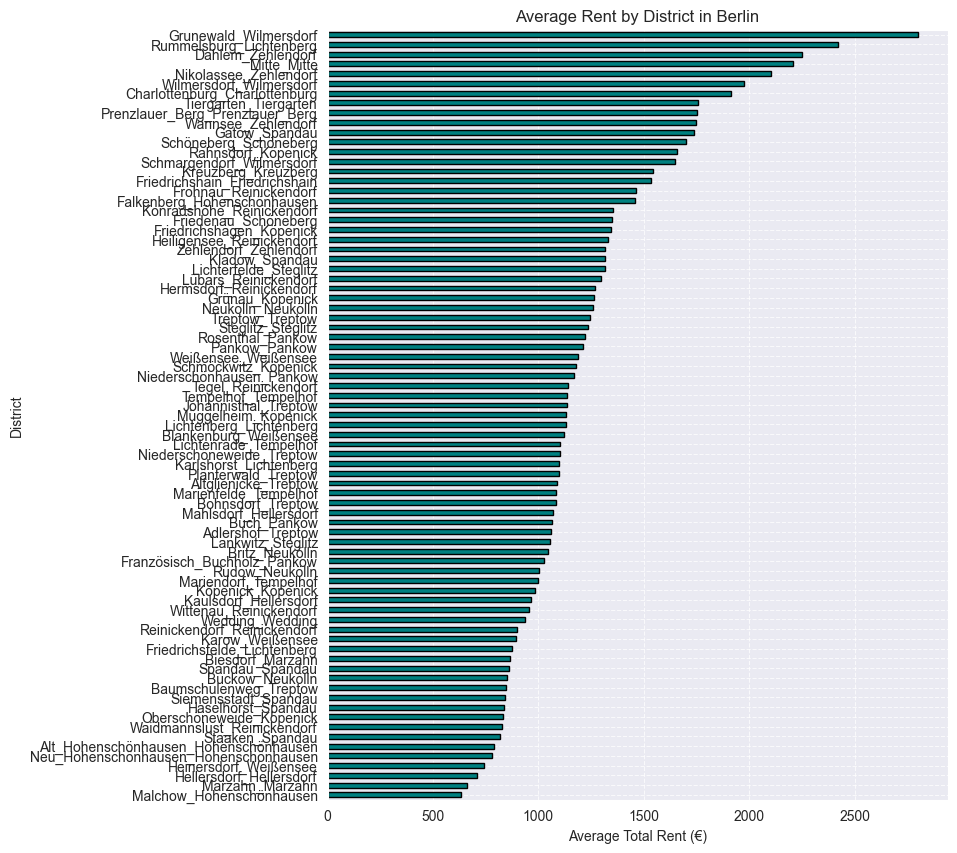

In [92]:
# grouped = df_berlin.groupby('regio3')  分组对象：pandas.core.groupyby.DataFrameGroupBy
# rents = grouped['totalRent'] 列分组对象：pandas.core.groupby.SeriesGroupby
# averages = rents.mean() 一维序列 (Index,Value)```: pandas.Series
# result = averages.sort_values() : pandas.Series
district_prices = df_berlin.groupby('regio3')['totalRent'].mean().sort_values()

# Horizontal bar chart
plt.figure(figsize=(8,10))
district_prices.plot(kind='barh', color='teal', edgecolor='black')

plt.title("Average Rent by District in Berlin")
plt.xlabel("Average Total Rent (€)")
plt.ylabel("District")
plt.grid(True, linestyle='--',alpha=0.75)
plt.show()


# PHASE 3 Base model_v1, consider 3 features
### machine learning : split, train, test/score


### 3.1 Pick features and target, which are numbers

In [93]:
# machine learning : split, train, test/score
# 3.1 Pick features and target, which are numbers
features = ['livingSpace','yearConstructed','noRooms']
target = 'totalRent'

X = df_berlin[features]
y = df_berlin[target]

### 3.2 Train/Test split: 80% X_train, 20% X_test

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"number of training samples: {X_train.shape[0]}")
print(f"number of test samples: {X_test.shape[0]}")

number of training samples: 6676
number of test samples: 1669


### 3.3 Training linear regression model

In [95]:
model = LinearRegression()
#Fit ,to learn
model.fit(X_train, y_train)

print("--Training Done!--")
print(f"Base Prise: {model.intercept_:.2f} €")
print(f"Weights: ")
# zip(), then inside every tuple: set feature-coef
for feature, coef in zip(features, model.coef_):
    print(f" {feature}: {coef:.2f}")

--Training Done!--
Base Prise: -3972.60 €
Weights: 
 livingSpace: 21.25
 yearConstructed: 2.00
 noRooms: -131.23


### 3.4 Prediction and evaluation

In [96]:
predictions = model.predict(X_test)
# MAE
mae = mean_absolute_error(y_test, predictions)
print(f"mean error : {mae:.2f} €")
# R2 决定系数 coefficient of determination, R-Squared=1-残差平方和SSres/总离差平方和SStot
# SStot：实际与平均数（傻子预测）差值的平方 SSres:实际与预测（模型预测）差值的平方
# r2 越接近1，越准确；越接近0，越不准；负数，完全错误
r2 = r2_score(y_test, predictions)
print(f"model score: {r2:.2%}")

mean error : 310.13 €
model score: 74.86%


### 3.5 Visual check

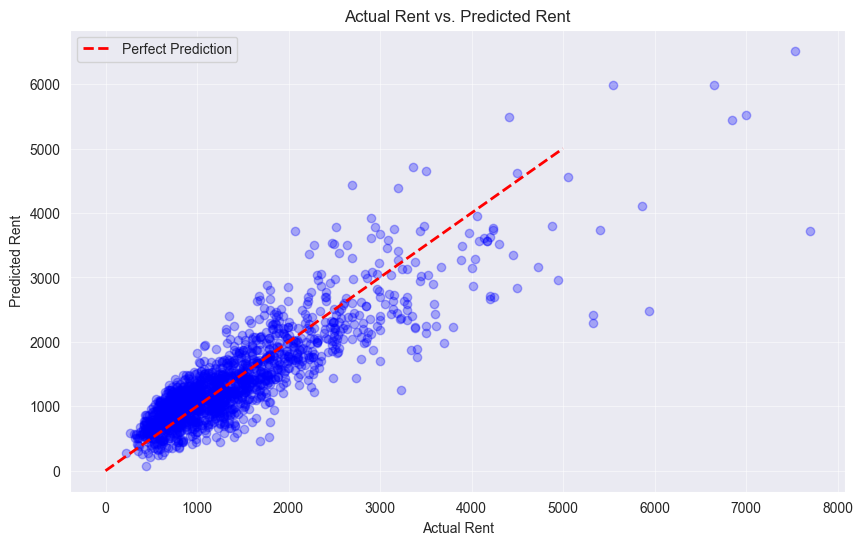

In [97]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions, alpha=0.3, color='blue')

# Draw diagonal line(guide line)
plt.plot([0,5000],[0,5000], color='red', linestyle='--',linewidth=2, label='Perfect Prediction')

plt.title("Actual Rent vs. Predicted Rent")
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

# PHASE 4 Base model_V2, add feature region3

### 4.1 Redefine features(add regio3)

In [98]:
features_v2 = ['livingSpace','yearConstructed','noRooms','regio3']
X_v2 = df_berlin[features_v2]

### 4.2 Generating feature 'regio3': One-Hot Encoding

In [99]:
# pd.get_dummies(): 0/1    columns=['regio3']: only this column
# drop_first=True: avoid multicollinearity/redundant in linear regression model
X_v2 = pd.get_dummies(X_v2, columns=['regio3'], drop_first=True)
print(f"V1 consider 3 features, V2 consider {X_v2.shape[1]} features")

V1 consider 3 features, V2 consider 81 features


### 4.3 Train/Test split: 80% X_train, 20% X_test

In [100]:
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_v2, y,test_size=0.2,random_state=42)

print(f"number of training samples: {X_train_v2.shape[0]}")
print(f"number of test samples: {X_test_v2.shape[0]}")

number of training samples: 6676
number of test samples: 1669


### 4.4 Training linear regression model

In [101]:
model_v2 = LinearRegression()
model_v2.fit(X_train_v2, y_train_v2)

print("--Training Done!--")

--Training Done!--


### 4.5 Prediction and evaluation

In [102]:
predictions_v2 = model_v2.predict(X_test_v2)
mae_v2 = mean_absolute_error(y_test_v2, predictions_v2)
r2_v2 = r2_score(y_test_v2, predictions_v2)

print("-" * 50)
print(f"V1 model (without region) R2: {r2:.2%} | MAE: {mae:.2f} € ")
print(f"V2 model (with region) R2: {r2_v2:.2%} | MAE: {mae_v2:.2f} € ")

--------------------------------------------------
V1 model (without region) R2: 74.86% | MAE: 310.13 € 
V2 model (with region) R2: 82.85% | MAE: 234.64 € 


### 4.6 Result printing

In [103]:
# model_v1: zip(features, model.coef_) is used for small size data
# model_v2: pd.DataFrame is for big size data
coef_df = pd.DataFrame({'Feature' : X_v2.columns, 'Weight' : model_v2.coef_})
print("Feature Weights DataFrame: ")
display(coef_df)
print("=" * 50)
print("5 Most Expensive Region in Berlin: ")
display (coef_df.sort_values(by='Weight', ascending=False).head(5))

Feature Weights DataFrame: 


,Feature,Weight
0,livingSpace,18.323788
1,yearConstructed,2.117760
2,noRooms,-64.631224
3,regio3_Alt_Hohenschönhausen_Hohenschönhausen,-150.622992
4,regio3_Altglienicke_Treptow,-161.807516
...,...,...
76,regio3_Wedding_Wedding,130.426590
77,regio3_Weißensee_Weißensee,66.947006
78,regio3_Wilmersdorf_Wilmersdorf,442.245554
79,regio3_Wittenau_Reinickendorf,-100.251396


5 Most Expensive Region in Berlin: 


,Feature,Weight
47,regio3_Mitte_Mitte,610.409774
22,regio3_Grunewald_Wilmersdorf,606.812901
57,regio3_Prenzlauer_Berg_Prenzlauer_Berg,472.003250
78,regio3_Wilmersdorf_Wilmersdorf,442.245554
72,regio3_Tiergarten_Tiergarten,422.620017


### 4.7 Visual check

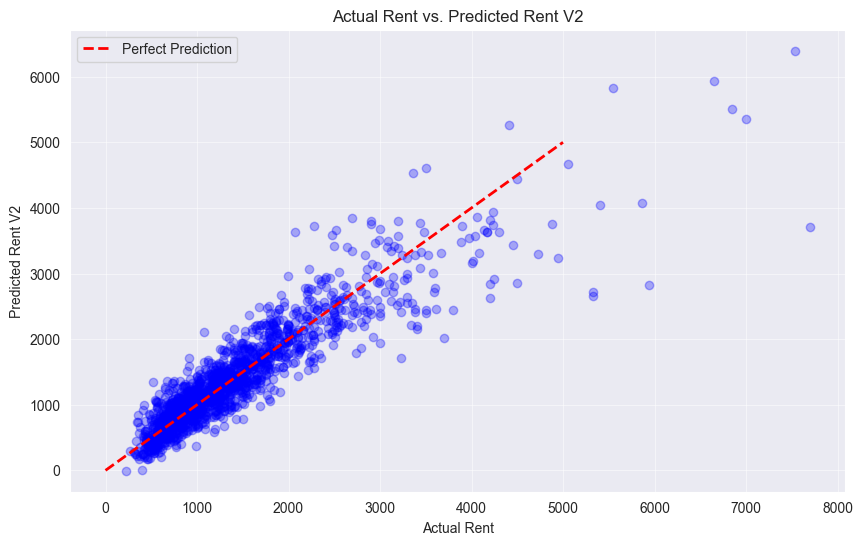

In [104]:
plt.figure(figsize=(10,6))
plt.scatter(y_test_v2, predictions_v2, alpha=0.3, color='blue')

# Draw diagonal line(guide line)
plt.plot([0,5000],[0,5000], color='red', linestyle='--',linewidth=2, label='Perfect Prediction')

plt.title("Actual Rent vs. Predicted Rent V2")
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent V2")
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

# PHASE 5 Model_v3 feature engineering


### 5.1 Feature construction
5.1.1 Custom feature: is_altbau

In [105]:
# .astype(int) change True/False to 1/0
df_berlin['is_altbau'] = (df_berlin['yearConstructed'] <= 1935).astype(int)

5.1.2 Boolean Features

In [106]:
bool_features = ['newlyConst','hasKitchen','balcony','lift']
for col in bool_features:
    # .fillna(0): change NaN to 0
    df_berlin[col] = df_berlin[col].fillna(0).astype(int)

5.1.3 Feature: floor numbers

In [107]:
# .fillna(median_floor): if NaN, change to median
median_floor = df_berlin['floor'].median()
df_berlin['floor'] = df_berlin['floor'].fillna(median_floor)

5.1.4 Add features

In [108]:
features_add = ['is_altbau','newlyConst','hasKitchen','balcony','lift','floor']
print("--Add Features Done--")
display(df_berlin[features_add].head())

--Add Features Done--


,is_altbau,newlyConst,hasKitchen,balcony,lift,floor
61,1,0,0,0,0,0.0
77,0,1,1,1,1,3.0
86,0,0,1,1,1,6.0
87,0,1,1,1,1,0.0
126,0,0,1,1,0,1.0


### 5.2 Redefine and generating features

In [109]:
features_v3 = features_v2 + features_add
X_v3 = df_berlin[features_v3]

# One-Hot Encoding
X_v3 = pd.get_dummies(X_v3, columns=['regio3'], drop_first=True)

print(f"V1 consider 3 features, V2 consider {X_v2.shape[1]} features")
print(f"V3 consider {X_v3.shape[1]} features.")

V1 consider 3 features, V2 consider 81 features
V3 consider 87 features.


### 5.3 Train/Test split: 80% X_train, 20% X_test

In [110]:
X_train_v3, X_test_v3, y_train_v3, y_test_v3 = train_test_split(X_v3, y, test_size=0.2, random_state=42)

print(f"number of training samples: {X_train_v2.shape[0]}")
print(f"number of test samples: {X_test_v2.shape[0]}")

number of training samples: 6676
number of test samples: 1669


### 5.4 Training linear regression model

In [111]:
model_v3 = LinearRegression()
model_v3.fit(X_train_v3, y_train_v3)

print("--Training Done!--")

--Training Done!--


### 5.5 Prediction and evaluation

In [112]:
predictions_v3 = model_v3.predict(X_test_v3)
mae_v3 = mean_absolute_error(y_test_v3, predictions_v3)
r2_v3 = r2_score(y_test_v3, predictions_v3)

print("== Model Evolution Process ==")
print(f"V1: R2 = {r2:.2%} | MAE: {mae:.2f} €")
print(f"V2: R2 = {r2_v2:.2%} | MAE: {mae_v2:.2f} €")
print(f"F3: R2 = {r2_v3:.2%} | MAE: {mae_v3:.2f} €")

== Model Evolution Process ==
V1: R2 = 74.86% | MAE: 310.13 €
V2: R2 = 82.85% | MAE: 234.64 €
F3: R2 = 84.01% | MAE: 221.15 €


### 5.6 Result printing

In [113]:
coef_df_v3 = pd.DataFrame({'Feature' : X_v3.columns, 'Weight' : model_v3.coef_})
print(coef_df_v3[:9])

           Feature      Weight
0      livingSpace   17.842970
1  yearConstructed    2.520065
2          noRooms  -61.883198
3        is_altbau  182.942837
4       newlyConst  121.822044
5       hasKitchen  120.702143
6          balcony   -9.633759
7             lift   84.385738
8            floor    2.106781


# Phase 6 UI

### 6.1 Prepare regio3 list

In [114]:
# df_berlin['regio3']: extract column 'regio3' separately
# .unique(): deduplication, only keep each name one time
# .tolist: convert NumPy array to a python list, which is preferred by IPyWidgets
# sorted(): python's built-in sorting function
kiez_options = sorted(df_berlin['regio3'].unique().tolist())

### 6.2 UI Widgets

6.2.1 Title

In [115]:
header = widgets.HTML("<h2>🏠 Berlin Apartment Rent Estimator (V3.0)</h2>")
instruction = widgets.HTML("<i>Please input your information below:</i>")

6.2.2 Input numbers

In [116]:
# w_area is an Object
w_area = widgets.FloatText(description='Area (sqm):', value=60)
w_year = widgets.IntText(description='Year Built:', value=1990)
w_rooms = widgets.FloatText(description='Rooms:', value=2)
w_floor = widgets.IntText(description='Floor:', value=2)

6.2.3 Input dropdown: Region

In [117]:
w_region = widgets.Dropdown(
    options=kiez_options,
    description='Region:',
    # if else None: defensive programming.
    # when kiez_options is an empty list,access [0] will crash(IndexError)
    value=kiez_options[0] if kiez_options else None,
    # keep the original width of the description
    style={'description_width': 'initial'}
)

6.2.4 Input dropdowns: Yes/No

In [118]:
style_bool = {'description_width': 'initial'}
w_new = widgets.Dropdown(options=['No', 'Yes'], description='Newly Constructed?', style=style_bool)
w_kitchen = widgets.Dropdown(options=['No', 'Yes'], description='Has Fitted Kitchen?', style=style_bool)
w_balcony = widgets.Dropdown(options=['No', 'Yes'], description='Has Balcony?', style=style_bool)
w_lift = widgets.Dropdown(options=['No', 'Yes'], description='Has Lift?', style=style_bool)

6.2.5 Button

In [119]:
# widgets.Button() is the class, btn_calc is the object
btn_calc = widgets.Button(
    description='Calculate Rent',
    # standard color scheme from  the Bootstrap framework used in web development
    # 'success':green, 'info':blue, 'warning':orange, 'danger':red,''(null):grey/white
    button_style='success',
    icon='calculator',
    # CSS style, width = 50% total width, margin: top/right/bottom/left distance
    layout=widgets.Layout(width='50%', margin='20px 0px 0px 0px')
)

6.2.6 Output

In [120]:
# output is a special "container component", serve as "display screen" or "capture device"
output = widgets.Output()

### 7.3 Backend Logic

In [121]:
def on_button_click(b):
    # with output: project any infos within this indented block to the 'output' screen
    with output:
        clear_output()
        print("⏳ Calculating...")

        try:
            # security check
            if 'model_v3' not in globals():
                print("❌ Error: model_v3 not found! Please run training code.")
                return
            if 'X_train_v3' not in globals():
                print("❌ Error: X_train_v3 not found! Please run split code.")
                return

            # 1. Set a table, only one row, columns are same as X_train_v3, set all values to 0
            input_df = pd.DataFrame(0, index=[0], columns=X_train_v3.columns)

            # 2. Input number values
            input_df['livingSpace'] = float(w_area.value)
            input_df['yearConstructed'] = int(w_year.value)
            input_df['noRooms'] = float(w_rooms.value)
            input_df['floor'] = float(w_floor.value)

            # 3. Input boolean values
            input_df['is_altbau'] = 1 if w_year.value <= 1949 else 0
            input_df['newlyConst'] = 1 if w_new.value == 'Yes' else 0
            input_df['hasKitchen'] = 1 if w_kitchen.value == 'Yes' else 0
            input_df['balcony'] = 1 if w_balcony.value == 'Yes' else 0
            input_df['lift'] = 1 if w_lift.value == 'Yes' else 0

            # 4. Input regio3 (One-Hot)
            target_col = f"regio3_{w_region.value}"
            if target_col in input_df.columns:
                input_df[target_col] = 1
            else:
                print(f"⚠️ Note: Region '{w_region.value}' not in training data. Using avg price.")

            # 5. prediction
            # model_v3.predict() return a numpy.ndarray, model_v3.predict()[0] return a number
            pred_price = model_v3.predict(input_df)[0]

            # 6. Final output
            print(f"\n--- Estimation Result ---")
            print(f"📍 Location: {w_region.value}")
            print(f"📐 Specs: {w_area.value} m² | {w_rooms.value} Rooms | Year {w_year.value}")
            print(f"✨ Amenities: Kitchen={w_kitchen.value}, Lift={w_lift.value}")
            print("=" * 50)
            print(f"💵 Estimated Warm Rent:  {pred_price:.2f} €") #operations on numbers
            print("=" * 50)

        # Exception Handling: try```except```
        # e is an object
        except Exception as e:
            print(f"\n❌ Runtime Error:")
            # type(e): <class'ZeroDivisionError>, is a class object
            # type(e).__name__: "ZeroDivisionError" , is a string, show the technical name
            print(f"Error Type: {type(e).__name__}")
            print(f"Message: {e}")
            # import the function "traceback"
            import traceback
            # print the complete traceback
            traceback.print_exc()

### 7.4 Bind and display:

In [122]:
# to understand: Object-Oriented Programming & Event-Driven Handling
# btn_calc is an object, _click_handlers is an attribute, .callbacks is a list
# = [], make the list empty(clear previous data)
btn_calc._click_handlers.callbacks = []
# Registering a Callback
# on_click(): object's method, will register the ()function on callbacks list, when click
btn_calc.on_click(on_button_click)

ui = widgets.VBox([
    header,
    instruction,
    widgets.HBox([w_area, w_year]),
    widgets.HBox([w_rooms, w_floor]),
    w_region,
    widgets.HBox([w_new, w_kitchen]),
    widgets.HBox([w_balcony, w_lift]),
    btn_calc,
    output
])

display(ui)